In [100]:
import pygame
import random
import time

In [101]:
# Define constants for the simulation
WIDTH = 1000
HEIGHT = 750
NUM_FOOD_SOURCES = 100
NUM_CREATURES = 50
MAX_POPULATION = NUM_CREATURES * 5
MIN_POPULATION = NUM_CREATURES // 5
INITIAL_ENERGY = 5.00
FOOD_RADIUS = 2.5
ENERGY_LOSS_RATE = 0.001
ENERGY_GAIN_PER_FOOD = 1
MAX_ENERGY = 25.00
MUTATION_RATE = 0.25
CROSSOVER_RATE = 0.5
REPRODUCTION_COOLDOWN = 4.5
GENERAL_REPRODUCTION_COOLDOWN = 3.5
CONSTANT_GENERAL_REPRODUCTION_COOLDOWN = 3.5
REPRODUCTION_PROBABILITY= 0.45
REPRODUCTION_RATE = 0.5
KILL_PROBABILITY = 0.35
DIE_PROBABILITY = 0.35
LIFE_PROBABILITY = 0.15
FOOD_REMOVE_PROBABILITY = 0.5
FOOD_CREATE_PROBABILITY = 0.25
FRAME_COUNT = 0
FRAME_COUNTER = 0
TOTAL_FRAME = 0
TOTAL_FRAME_COPY = 0
NUM_GENERATIONS = 25
NEW_GEN_PRO = 0.9

# Define the colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
FOOD_COLOR = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
CREATURE_COLOR = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

# Define the font
pygame.font.init()
FONT = pygame.font.SysFont('Comic Sans MS', 20)

In [102]:
# Define utility functions
def distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [103]:
# Define classes for the simulation
class Creature:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.quantity = 1
        self.energy = INITIAL_ENERGY
        self.speed = random.uniform(0.5, 2.0)
        self.color = CREATURE_COLOR
        self.reproduction_cooldown = REPRODUCTION_COOLDOWN
    
    # def update(self, food_sources, creatures):
    def update(self, food_sources):
        # Move the creature towards the nearest food source
        nearest_food = min(food_sources, key=lambda f: distance(self.x, self.y, f.x, f.y))
        dx = nearest_food.x - self.x
        dy = nearest_food.y - self.y
        dist = distance(self.x, self.y, nearest_food.x, nearest_food.y)
        if dist > 0:
            self.x += dx / dist * self.speed
            self.y += dy / dist * self.speed
        # Eat the food source if the creature is within range
        if dist < 10:
            nearest_food.quantity -= 1
            self.energy = min(MAX_ENERGY, self.energy + ENERGY_GAIN_PER_FOOD)
        
        self.reproduction_cooldown = max(0, self.reproduction_cooldown - 1)
    
    def draw(self, surface):
        pygame.draw.circle(surface, self.color, (int(self.x), int(self.y)), 5)
    
    def is_alive(self):
        return self.energy > 0 and self.energy < MAX_ENERGY and self.quantity >= 1
    
    def reproduce(self):
        if random.random < REPRODUCTION_PROBABILITY:
            if self.energy > 4 and self.reproduction_cooldown == 0:
                self.energy -= 4
                child = Creature(self.x + random.uniform(-10, 10), self.y + random.uniform(-10, 10))
                # Apply mutation
                if random.random() < MUTATION_RATE:
                    child.mutate()
                self.reproduction_cooldown += 100
                return child
    
    def mutate(self):
        self.speed += random.uniform(-0.1, 0.1)
        self.color = (max(0, min(255, self.color[0] + random.randint(-10, 10))), 
                      max(0, min(255, self.color[1] + random.randint(-10, 10))), 
                      max(0, min(255, self.color[2] + random.randint(-10, 10))))
    
    def crossover(self, other):
        child = Creature(self.x, self.y)
        # Perform crossover
        if random.random() < CROSSOVER_RATE:
            child.speed = (self.speed + other.speed) / 2
        else:
            child.speed = random.choice([self.speed, other.speed])
        child.color = (self.color[0], other.color[1], self.color[2])
        return child
    
    def generation():
        # Create the initial population of creatures
        creatures = []
        for i in range(NUM_CREATURES):
            x = random.randint(0, WIDTH)
            y = random.randint(0, HEIGHT)
            creatures.append(Creature(x, y))

        # Sort the creatures by energy in descending order
        creatures.sort(key=lambda c: c.energy, reverse=True)

        # Create a new generation of creatures
        new_generation = []

        # Create offspring through sexual reproduction
        for i in range(NUM_CREATURES // 2):
            # Select two parents based on fitness
            parent1 = random.choice(creatures[:NUM_CREATURES // 4])
            parent2 = random.choice(creatures[:NUM_CREATURES // 4])
            # Create a child through crossover and mutation
            child = parent1.crossover(parent2)
            if random.random() < MUTATION_RATE:
                child.mutate()
            new_generation.append(child)

        # Create offspring through asexual reproduction
        for creature in creatures[:NUM_CREATURES // 4]:
            if creature.reproduction_cooldown == 0:
                child = creature.reproduce()
                if child is not None:
                    new_generation.append(child)

        # Remove the least fit creatures
        creatures = creatures[:NUM_CREATURES // 2]
        num_to_remove = int(len(creatures) * KILL_PROBABILITY)
        creatures = creatures[:-num_to_remove]

        # Add the new generation to the population
        creatures.extend(new_generation)

        return creatures

In [104]:
class FoodSource:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.quantity = 1
        self.color = FOOD_COLOR
    
    def draw(self, surface):
        pygame.draw.circle(surface, self.color, (int(self.x), int(self.y)), 5)
    
    def is_empty(self):
        return self.quantity == 0

In [105]:
# Initialize the simulation
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Survival Genetic Algorithm")
clock = pygame.time.Clock()

# Create the food sources
food_sources = []
for i in range(NUM_FOOD_SOURCES):
    x = random.randint(0, WIDTH)
    y = random.randint(0, HEIGHT)
    food_sources.append(FoodSource(x, y))

# Create the initial population of creatures
creatures = []
for i in range(NUM_CREATURES):
    x = random.randint(0, WIDTH)
    y = random.randint(0, HEIGHT)
    creatures.append(Creature(x, y))

# Initialize the start population
START_POPULATION = len(creatures)

# Start the main loop of the simulation
running = True
start_time = time.time()
start_time_copy = time.time()
start_time_copy_1 = time.time()
start_time_copy_2 = time.time()
total_time = 0.0
times = []
generation = 1

In [106]:
while running:
    # Increment the frame counter
    FRAME_COUNT += 1
    FRAME_COUNTER += 1
    TOTAL_FRAME += 1
    TOTAL_FRAME_COPY += 1

    if (TOTAL_FRAME_COPY >= 1e-25 and ((start_time_copy - time.time()) > 25)):
        TOTAL_FRAME_COPY = 0
        start_time_copy = time.time()
        if ((FRAME_COUNTER >= 60) and (random.random() < NEW_GEN_PRO)):
            if generation <= NUM_GENERATIONS:
                end_time = time.time()
            
                elapsed_time = end_time - start_time
                text = FONT.render(f'Time - Generation {generation}: {elapsed_time:.2f}', True, BLACK)
                screen.blit(text, (int(WIDTH/2 - text.get_width()/2), int(HEIGHT/2 - text.get_height()/2)))

                # Wait for a short time
                pygame.display.flip()
                pygame.time.wait(3000)

                new_creatures = Creature.generation()
                total_time += elapsed_time
                times.append((elapsed_time,generation))
                generation += 1
                start_time = time.time()
                creatures = creatures + new_creatures
            FRAME_COUNTER = 0

    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE or event.key == pygame.K_q:
                running = False
    
    # Update the creatures
    n_creatures = creatures.copy()
    for creature in creatures:
        creature.update(food_sources)
        creature.energy -= ENERGY_LOSS_RATE

    creatures = n_creatures.copy()
    
    # Remove any dead creatures
    creatures = [creature for creature in creatures if creature.is_alive()]

    # Remove any food sources that are empty
    food_sources = [food_source for food_source in food_sources if not food_source.is_empty()]
    
    if FRAME_COUNT >= 1:
        FRAME_COUNT = 0

        if (start_time_copy_1 - time.time() >= 10):
            start_time_copy_1 = time.time()
            for c in n_creatures:
                n_creatures_copy = n_creatures.copy()
                if c in n_creatures_copy:
                    n_creatures_copy.remove(c)
                for c1 in n_creatures_copy:
                    dist = distance(c1.x,c1.y,c.x,c.y)
                    if dist <= 10:
                        n_creatures.remove(c1)

        # Reduce General reproduction cooldown
        GENERAL_REPRODUCTION_COOLDOWN -= max(0, GENERAL_REPRODUCTION_COOLDOWN - 1)

        # Reproduce the creatures
        if GENERAL_REPRODUCTION_COOLDOWN == 0:
            GENERAL_REPRODUCTION_COOLDOWN == CONSTANT_GENERAL_REPRODUCTION_COOLDOWN
            if random.random() < REPRODUCTION_PROBABILITY:
                num_offspring = int(len(creatures) * REPRODUCTION_RATE)
                for i in range(num_offspring):
                    for j in range(i + 1, num_offspring):
                        if random.random() < REPRODUCTION_PROBABILITY:
                            if random.random() < KILL_PROBABILITY:
                                # Randomly kill the creature
                                continue
                            else:
                                child = creatures[i].crossover(creatures[j])
                                creatures.append(child)
        
        # Create new food sources
        while len(food_sources) < NUM_FOOD_SOURCES:
            x = random.randint(0, WIDTH)
            y = random.randint(0, HEIGHT)
            food_sources.append(FoodSource(x, y))

        # Random cross-over and mutation for with new creature
        if (random.random() < REPRODUCTION_PROBABILITY) or ((len(creatures) < MIN_POPULATION) and ((start_time_copy_2 - time.time()) >= 25)):
            start_time_copy_2 = time.time()
            parent_1 = random.choice(creatures)
            parent_2 = random.choice(creatures)
            child = parent_1.crossover(parent_2)
            if random.random() < MUTATION_RATE:
                child.mutate()
            creatures.append(child)
        
        # Random dead mechanism
        random_num_1 = (2 * (random.randint(1, 10)**random.randint(1, 3)))
        random_num_2 = (random.randint(1, 10) + random.random())**random.random()
        random_num_3 = LIFE_PROBABILITY - DIE_PROBABILITY - KILL_PROBABILITY
        random_num_4 = (2 * (random.randint(1, 10)**random.randint(1, 3)))
        random_num_5 = (random.randint(1, 10) + random.random())**random.random()
        random_num = int(int((3 * START_POPULATION * random_num_1 + random_num_2 - random_num_3) // (random_num_4)) + random_num_5)
        if not creatures:
            continue
        if (len(creatures) > MAX_POPULATION) or ((len(creatures) > int(random_num) or random.random() < DIE_PROBABILITY)):
            # Randomly select a creature to kill
            creature_to_kill = random.choice(creatures)
            # Remove the creature from the list of creatures
            creatures.remove(creature_to_kill)

        # Random food remove mechanism
        if (len(food_sources) > NUM_FOOD_SOURCES * 3) or (random.random() < FOOD_REMOVE_PROBABILITY):
            # Randomly select a creature to kill
            food_to_remove = random.choice(food_sources)
            # Remove the creature from the list of creatures
            food_sources.remove(food_to_remove)

        # Random food create mechanism
        if random.random() < FOOD_CREATE_PROBABILITY:
            x = random.randint(0, WIDTH)
            y = random.randint(0, HEIGHT)
            food_sources.append(FoodSource(x, y))
    
    # Draw the scene
    screen.fill(WHITE)
    text_gen = FONT.render(f'Generation: {generation}', True, BLACK)
    screen.blit(text_gen, (int(WIDTH-125 - text_gen.get_width()/2), int(HEIGHT-50 - text_gen.get_height()/2)))

    text_num = FONT.render(f'Number of creature: {len(creatures)}', True, BLACK)
    screen.blit(text_num, (int(WIDTH-125 - text_num.get_width()/2), int(HEIGHT-75 - text_num.get_height()/2)))
    for food_source in food_sources:
        pygame.draw.circle(screen, food_source.color, (int(food_source.x), int(food_source.y)), FOOD_RADIUS)
        text = FONT.render("f", True, BLACK)
        screen.blit(text, (int(food_source.x)-20, int(food_source.y)-20))
    for i, creature in enumerate(creatures):
        creature.draw(screen)
        text = FONT.render(f"c {1+i} - Energy{creature.energy:.2f}", True, BLACK)
        screen.blit(text, (int(creature.x)-20, int(creature.y)-20))
    pygame.display.flip()
    
    # Check if simulation should end
    if len(creatures) == 0 and generation <= NUM_GENERATIONS:
        end_time = time.time()
        
        elapsed_time = end_time - start_time
        text = FONT.render(f'Time - Generation {generation}: {elapsed_time:.2f}', True, BLACK)
        screen.blit(text, (int(WIDTH/2 - text.get_width()/2), int(HEIGHT/2 - text.get_height()/2)))

        # Wait for a short time
        pygame.display.flip()
        pygame.time.wait(3000)

        creatures = Creature.generation()
        total_time += elapsed_time
        times.append((elapsed_time,generation))
        generation += 1
        start_time = time.time()

        if generation > NUM_GENERATIONS:
            running = False

    # Update the display
    pygame.display.flip()
    
    # Wait for a short time
    clock.tick(30)

# Quit the simulation
pygame.quit()

In [107]:
for t,i in enumerate(times):
    print(f'Time: {i}, Gen: {t+1}')

Time: (122.7094976902008, 1), Gen: 1
Time: (122.69843912124634, 2), Gen: 2
Time: (39.72857737541199, 3), Gen: 3
Time: (127.65294766426086, 4), Gen: 4
Time: (109.45827627182007, 5), Gen: 5
Time: (85.97508931159973, 6), Gen: 6
Time: (62.15200209617615, 7), Gen: 7
Time: (83.89985513687134, 8), Gen: 8
Time: (28.956729412078857, 9), Gen: 9
Time: (124.31900644302368, 10), Gen: 10
Time: (80.2499577999115, 11), Gen: 11
Time: (102.46835255622864, 12), Gen: 12
Time: (12.769411325454712, 13), Gen: 13
Time: (13.081971406936646, 14), Gen: 14
Time: (24.68249011039734, 15), Gen: 15
Time: (54.8291277885437, 16), Gen: 16
Time: (21.46298623085022, 17), Gen: 17
Time: (68.9168119430542, 18), Gen: 18
Time: (53.19636034965515, 19), Gen: 19
Time: (40.92443585395813, 20), Gen: 20
Time: (57.822402238845825, 21), Gen: 21
Time: (90.3507924079895, 22), Gen: 22
Time: (170.0156021118164, 23), Gen: 23
Time: (36.112955808639526, 24), Gen: 24
Time: (61.60836410522461, 25), Gen: 25


In [108]:
# Sort times and print results
times.sort()
if times:
    best_time = times[-1][0]
    best_gen = times[-1][1]
    print(f'Best time: {best_time:.2f} sec (generation {best_gen})')
else:
    print('No results.')
print(f'Total time: {total_time:.2f} sec')

Best time: 170.02 sec (generation 23)
Total time: 1796.04 sec


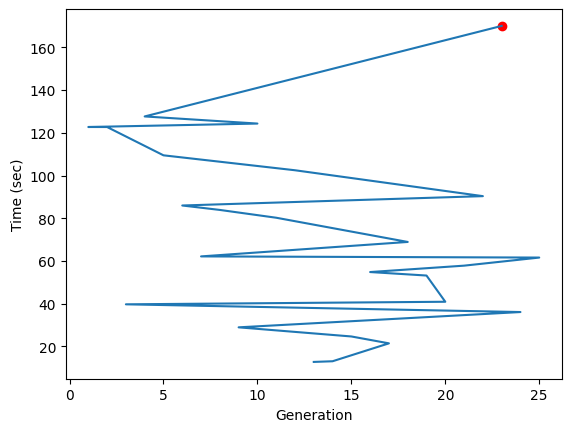

In [112]:
import matplotlib.pyplot as plt
# Extract the data into separate lists
gen = [i[1] for i in times]
time = [i[0] for i in times]

# Plot the data
plt.plot(gen, time)
plt.xlabel('Generation')
plt.ylabel('Time (sec)')

# Highlight the best time in red
if times:
    best_time = times[-1][0]
    best_gen = times[-1][1]
    plt.scatter(best_gen, best_time, color='red', marker='o')

# Show the plot
plt.savefig('fig.png')
plt.show()